In [1]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange
scaler = MinMaxScaler()

In [3]:
df = pd.read_excel("Temperature in Sao Paulo.xlsx",index_col='Date',parse_dates=True, sheet_name="NASDAQ")
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(len(test)-window_size):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
    y.append(test[i+window_size])
  return np.array(X), np.array(y)

Best hyperparameters

Epoch: 3 | Inputs: 189 | Kernel: 3 | Dropout: 0.2 | Loss: mae




# H=1 Forecasts

In [4]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [5]:
for i in range(15):
  n_features = 3
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7)-n_input:]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  X, y = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(y), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  test=test[n_input:]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
107/107 [==============================] - 16s 12ms/step - loss: 0.7068 - accuracy: 2.9438e-04 - mean_absolute_error: 0.7068
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1412 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1412
Epoch 3/3
49/49 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.6001 - accuracy: 0.0000e+00 - mean_absolute_error: 0.6001
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1133 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1133
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 12ms/step - loss: 0.8530 - accuracy: 2.9438e-04 - mean_absolute_error: 0.8530
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1303 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1303
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 11ms/step - loss: 1.2980 - accuracy: 2.9438e-04 - mean_absolute_error: 1.2980
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1760 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1760
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 11ms/step - loss: 0.9527 - accuracy: 2.9438e-04 - mean_absolute_error: 0.9527
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1352 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1352
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 11ms/step - loss: 0.7108 - accuracy: 0.0000e+00 - mean_absolute_error: 0.7108
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1197 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1197
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 12ms/step - loss: 0.7957 - accuracy: 2.9438e-04 - mean_absolute_error: 0.7957
Epoch 2/3
107/107 [==============================] - 1s 13ms/step - loss: 0.1555 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1555
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 1.2779 - accuracy: 2.9438e-04 - mean_absolute_error: 1.2779
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.2008 - accuracy: 2.9438e-04 - mean_absolute_error: 0.2008
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 11ms/step - loss: 0.9833 - accuracy: 2.9438e-04 - mean_absolute_error: 0.9833
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1635 - accuracy: 0.0000e+00 - mean_absolute_error: 0.1635
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 11ms/step - loss: 0.8256 - accuracy: 0.0000e+00 - mean_absolute_error: 0.8256
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1301 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1301
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.9170 - accuracy: 2.9438e-04 - mean_absolute_error: 0.9170
Epoch 2/3
107/107 [==============================] - 1s 12ms/step - loss: 0.1514 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1514
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.8129 - accuracy: 2.9438e-04 - mean_absolute_error: 0.8129
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1625 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1625
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.5122 - accuracy: 2.9438e-04 - mean_absolute_error: 0.5122
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0952 - accuracy: 2.9438e-04 - mean_absolute_error: 0.0952
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.7655 - accuracy: 2.9438e-04 - mean_absolute_error: 0.7655
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1156 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1156
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 14ms/step - loss: 0.9568 - accuracy: 2.9438e-04 - mean_absolute_error: 0.9568
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1648 - accuracy: 2.9438e-04 - mean_absolute_error: 0.1648
Epoch 3/3
49/49 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
Accuracy

[39.5495342122096,
 55.73378264973934,
 39.05873213878013,
 48.31913672927182,
 49.01654462537706,
 49.96195933999671,
 54.16854946992664,
 40.33966440952593,
 22.69736996094195,
 49.804509860957644,
 43.89081085136699,
 54.46748524381013,
 51.581902625276484,
 55.649304019464395,
 14.321124594406998]

In [7]:
RMSE

[0.00408522747812331,
 0.003655993534873488,
 0.00524313775217186,
 0.004545115833032247,
 0.003740935884660696,
 0.0038862741488792565,
 0.0039378519693798976,
 0.004339715789437359,
 0.0047997703362659344,
 0.0038160701839047555,
 0.0043609064764580634,
 0.0041502592204030395,
 0.003626632697250981,
 0.004252946167135287,
 0.005313842693788301]

In [8]:
Quasilikelihood

[0.19810932497491648,
 0.1431843686358403,
 0.4661592286802494,
 0.20823736059582343,
 0.15734176112700876,
 0.16701505541304534,
 0.1642934967292374,
 0.19972068268379328,
 0.28424597702554666,
 0.1637154820110409,
 0.17753946877344665,
 0.19333982899397914,
 0.15086350618071817,
 0.1418036106622745,
 0.31470291478239854]

Text(0, 0.5, 'NASDAQ Realized Volatility')

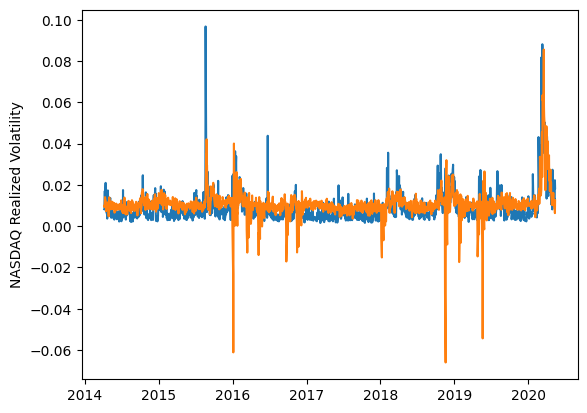

In [9]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

In [10]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

# H=3 Forecasts

In [11]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [12]:
for i in range (15):
  n_features = 3
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-1]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.9347 - accuracy: 0.3418 - mean_absolute_error: 0.9347
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.1077 - accuracy: 0.3415 - mean_absolute_error: 0.1077
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 19ms/step - loss: 0.7241 - accuracy: 0.3453 - mean_absolute_error: 0.7241
Epoch 2/3
107/107 [==============================] - 2s 21ms/step - loss: 0.0829 - accuracy: 0.3067 - mean_absolute_error: 0.0829
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 14ms/step - loss: 0.5992 - accuracy: 0.3059 - mean_absolute_error: 0.5992
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0801 - accuracy: 0.3438 - mean_absolute_error: 0.0801
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.7555 - accuracy: 0.3047 - mean_absolute_error: 0.7555
Epoch 2/3
107/107 [==============================] - 1s 13ms/step - loss: 0.0935 - accuracy: 0.3229 - mean_absolute_error: 0.0935
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.6581 - accuracy: 0.3347 - mean_absolute_error: 0.6581
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0705 - accuracy: 0.3165 - mean_absolute_error: 0.0705
Epoch 3/3
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.9114 - accuracy: 0.3506 - mean_absolute_error: 0.9114
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1321 - accuracy: 0.3309 - mean_absolute_error: 0.1321
Epoch 3/3
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.6183 - accuracy: 0.3262 - mean_absolute_error: 0.6183
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0942 - accuracy: 0.3435 - mean_absolute_error: 0.0942
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.4928 - accuracy: 0.3400 - mean_absolute_error: 0.4928
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0886 - accuracy: 0.3939 - mean_absolute_error: 0.0886
Epoch 3/3
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 9s 10ms/step - loss: 0.6596 - accuracy: 0.3268 - mean_absolute_error: 0.6596
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0812 - accuracy: 0.3209 - mean_absolute_error: 0.0812
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5473 - accuracy: 0.3391 - mean_absolute_error: 0.5473
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0593 - accuracy: 0.3562 - mean_absolute_error: 0.0593
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 8s 10ms/step - loss: 0.8725 - accuracy: 0.3047 - mean_absolute_error: 0.8725
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1415 - accuracy: 0.2997 - mean_absolute_error: 0.1415
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.6360 - accuracy: 0.3512 - mean_absolute_error: 0.6360
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0734 - accuracy: 0.3432 - mean_absolute_error: 0.0734
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.7716 - accuracy: 0.3559 - mean_absolute_error: 0.7716
Epoch 2/3
107/107 [==============================] - 1s 14ms/step - loss: 0.0865 - accuracy: 0.3565 - mean_absolute_error: 0.0865
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.7059 - accuracy: 0.3273 - mean_absolute_error: 0.7059
Epoch 2/3
107/107 [==============================] - 1s 12ms/step - loss: 0.0951 - accuracy: 0.2941 - mean_absolute_error: 0.0951
Epoch 3/3
16/16 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 9ms/step - loss: 0.8346 - accuracy: 0.3020 - mean_absolute_error: 0.8346
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.1313 - accuracy: 0.2805 - mean_absolute_error: 0.1313
Epoch 3/3
16/16 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
Accuracy

[33.48530110769153,
 46.064278504714295,
 48.22008874297059,
 42.860418877048275,
 50.35704893175896,
 45.743592590965044,
 53.200419030615855,
 43.81171993261512,
 53.662897829365285,
 46.136402683641144,
 7.047307397049396,
 49.326668338927234,
 50.28759174675286,
 47.556666060480865,
 52.51163838169295]

In [14]:
RMSE

[0.004473587055963102,
 0.003917273890602959,
 0.004106853381337945,
 0.004066314568295863,
 0.003823575461972871,
 0.004166740578926943,
 0.003957657163420436,
 0.003933671261953468,
 0.0037252846196756686,
 0.003966156759275405,
 0.0072322204162424296,
 0.0039563251694521365,
 0.0038270015738183527,
 0.003986038646677272,
 0.003967835254531722]

In [15]:
Quasilikelihood

[0.2330825381654097,
 0.18140890974809307,
 0.1761401743168711,
 0.18706777947392741,
 0.16608005930328595,
 0.18805697113045197,
 0.1602089393897767,
 0.1863590028451446,
 0.1430930527052766,
 0.176605670154241,
 0.46827091293644574,
 0.1648375927677882,
 0.16393918583156733,
 0.18230300224788407,
 0.16508413948860412]

Text(0, 0.5, 'NASDAQ Realized Volatility')

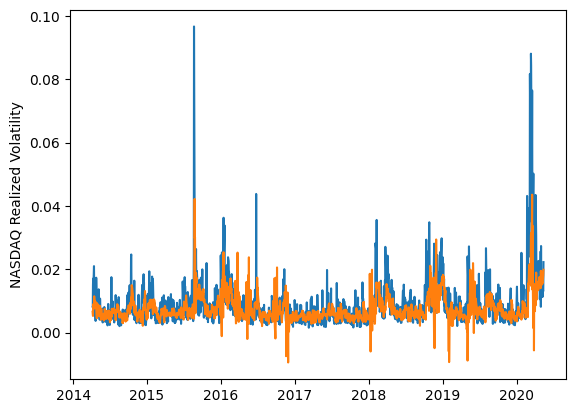

In [16]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=5 Forecasts

In [17]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [18]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [19]:
for i in range (15):
  n_features = 3
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-2]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.5966 - accuracy: 0.1610 - mean_absolute_error: 0.5966
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0767 - accuracy: 0.1863 - mean_absolute_error: 0.0767
Epoch 3/3
10/10 [==============================] - 1s 16ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.5477 - accuracy: 0.1934 - mean_absolute_error: 0.5477
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0770 - accuracy: 0.1713 - mean_absolute_error: 0.0770
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 9ms/step - loss: 0.4808 - accuracy: 0.1896 - mean_absolute_error: 0.4808
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0560 - accuracy: 0.2161 - mean_absolute_error: 0.0560
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.7293 - accuracy: 0.1802 - mean_absolute_error: 0.7293
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0738 - accuracy: 0.2167 - mean_absolute_error: 0.0738
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 8s 14ms/step - loss: 0.5309 - accuracy: 0.1981 - mean_absolute_error: 0.5309
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0587 - accuracy: 0.1760 - mean_absolute_error: 0.0587
Epoch 3/3
10/10 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.9227 - accuracy: 0.2149 - mean_absolute_error: 0.9227
Epoch 2/3
107/107 [==============================] - 1s 11ms/step - loss: 0.0916 - accuracy: 0.1793 - mean_absolute_error: 0.0916
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4730 - accuracy: 0.1949 - mean_absolute_error: 0.4730
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0550 - accuracy: 0.1963 - mean_absolute_error: 0.0550
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 8s 10ms/step - loss: 0.6454 - accuracy: 0.2108 - mean_absolute_error: 0.6454
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0649 - accuracy: 0.2025 - mean_absolute_error: 0.0649
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.4674 - accuracy: 0.1987 - mean_absolute_error: 0.4674
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0653 - accuracy: 0.2016 - mean_absolute_error: 0.0653
Epoch 3/3
10/10 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 11ms/step - loss: 0.4611 - accuracy: 0.1937 - mean_absolute_error: 0.4611
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0600 - accuracy: 0.1787 - mean_absolute_error: 0.0600
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.6323 - accuracy: 0.2267 - mean_absolute_error: 0.6323
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0672 - accuracy: 0.2349 - mean_absolute_error: 0.0672
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.7617 - accuracy: 0.2008 - mean_absolute_error: 0.7617
Epoch 2/3
107/107 [==============================] - 1s 12ms/step - loss: 0.0933 - accuracy: 0.1872 - mean_absolute_error: 0.0933
Epoch 3/3
10/10 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.5300 - accuracy: 0.2122 - mean_absolute_error: 0.5300
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0741 - accuracy: 0.1590 - mean_absolute_error: 0.0741
Epoch 3/3
10/10 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.6592 - accuracy: 0.1990 - mean_absolute_error: 0.6592
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0807 - accuracy: 0.2120 - mean_absolute_error: 0.0807
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.8659 - accuracy: 0.1875 - mean_absolute_error: 0.8659
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0955 - accuracy: 0.1831 - mean_absolute_error: 0.0955
Epoch 3/3
10/10 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
Accuracy

[49.99025656189213,
 52.01295895938114,
 45.88577230564952,
 33.29916091191885,
 41.57480086683537,
 45.98000746039995,
 50.00632844784043,
 42.990607315178394,
 46.2388594028996,
 45.89848279632995,
 44.71933317918912,
 44.568855313106546,
 49.257808834351835,
 42.301117258837614,
 52.34087940682768]

In [21]:
RMSE

[0.003835063370666967,
 0.0038591291743682653,
 0.003900631750099277,
 0.0043054266472068465,
 0.0040972481696806146,
 0.004004171140929216,
 0.0037422128793203556,
 0.0038965643770313522,
 0.003934068010997128,
 0.004105181836424144,
 0.004048340243557318,
 0.004133156719537541,
 0.0039236101003482385,
 0.004082973622018191,
 0.0038500307040533087]

In [22]:
Quasilikelihood

[0.16360061313694585,
 0.15026492746988324,
 0.17836747808230027,
 0.23630708788845067,
 0.19554980081790632,
 0.17934359926443944,
 0.15966789555500052,
 0.18839155715215306,
 0.17976211122302485,
 0.1850474411546352,
 0.18303310706330211,
 0.1853315398461647,
 0.16924906653314775,
 0.19876839093354173,
 0.1583262136055777]

Text(0, 0.5, 'NASDAQ Realized Volatility')

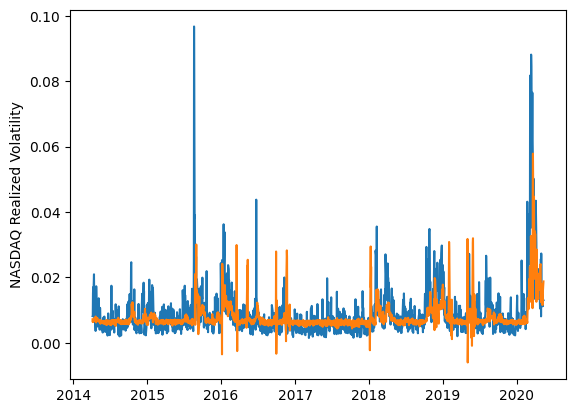

In [23]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=10 Forecasts

In [24]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [25]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [26]:
for i in range (15):
  n_features = 3
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-7]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.7809 - accuracy: 0.0889 - mean_absolute_error: 0.7809
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0675 - accuracy: 0.0977 - mean_absolute_error: 0.0675
Epoch 3/3
5/5 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.4426 - accuracy: 0.0921 - mean_absolute_error: 0.4426
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0431 - accuracy: 0.0718 - mean_absolute_error: 0.0431
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 13ms/step - loss: 0.3804 - accuracy: 0.1030 - mean_absolute_error: 0.3804
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0440 - accuracy: 0.0689 - mean_absolute_error: 0.0440
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.5394 - accuracy: 0.0871 - mean_absolute_error: 0.5394
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0503 - accuracy: 0.0916 - mean_absolute_error: 0.0503
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 12ms/step - loss: 0.6413 - accuracy: 0.0830 - mean_absolute_error: 0.6413
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0709 - accuracy: 0.0810 - mean_absolute_error: 0.0709
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4904 - accuracy: 0.1225 - mean_absolute_error: 0.4904
Epoch 2/3
107/107 [==============================] - 1s 13ms/step - loss: 0.0516 - accuracy: 0.1369 - mean_absolute_error: 0.0516
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 9ms/step - loss: 0.5246 - accuracy: 0.0777 - mean_absolute_error: 0.5246
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0575 - accuracy: 0.0765 - mean_absolute_error: 0.0575
Epoch 3/3
5/5 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5591 - accuracy: 0.0815 - mean_absolute_error: 0.5591
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0566 - accuracy: 0.0863 - mean_absolute_error: 0.0566
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5473 - accuracy: 0.0868 - mean_absolute_error: 0.5473
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0555 - accuracy: 0.0951 - mean_absolute_error: 0.0555
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5752 - accuracy: 0.1089 - mean_absolute_error: 0.5752
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0521 - accuracy: 0.1042 - mean_absolute_error: 0.0521
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 9ms/step - loss: 0.4610 - accuracy: 0.0874 - mean_absolute_error: 0.4610
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0471 - accuracy: 0.0889 - mean_absolute_error: 0.0471
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 8s 11ms/step - loss: 0.4942 - accuracy: 0.1407 - mean_absolute_error: 0.4942
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0509 - accuracy: 0.1528 - mean_absolute_error: 0.0509
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.5359 - accuracy: 0.0854 - mean_absolute_error: 0.5359
Epoch 2/3
107/107 [==============================] - 1s 14ms/step - loss: 0.0529 - accuracy: 0.1080 - mean_absolute_error: 0.0529
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 9ms/step - loss: 0.5834 - accuracy: 0.0495 - mean_absolute_error: 0.5834
Epoch 2/3
107/107 [==============================] - 1s 12ms/step - loss: 0.0513 - accuracy: 0.0430 - mean_absolute_error: 0.0513
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4514 - accuracy: 0.1063 - mean_absolute_error: 0.4514
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0587 - accuracy: 0.0742 - mean_absolute_error: 0.0587
Epoch 3/3
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
Accuracy

[35.96699354802808,
 48.34801823808469,
 50.91102956222937,
 41.71944071335717,
 43.43585663003958,
 42.71764856924728,
 39.958086543341906,
 34.94428378720427,
 39.733668631504415,
 46.283730895348604,
 44.15626796937785,
 33.237616270486356,
 44.55701571540344,
 26.529041713495605,
 47.918712381222676]

In [28]:
RMSE

[0.004503783589205245,
 0.003930880109298221,
 0.004035645991630584,
 0.004119477024179112,
 0.004058586633833886,
 0.004265698418831662,
 0.0042725009973750925,
 0.004496794808025005,
 0.004256083193280861,
 0.003968525269255437,
 0.004054708062813981,
 0.004425648837368163,
 0.004122943019117511,
 0.004716776165214602,
 0.004061555384070464]

In [29]:
Quasilikelihood

[0.22252724405691532,
 0.17375215223737994,
 0.17136103591732382,
 0.19616754978075757,
 0.19042154076198103,
 0.20388550668809616,
 0.21407825018515395,
 0.23866679053454212,
 0.21145687903018975,
 0.18367671165510635,
 0.18726193924952747,
 0.24357267697258003,
 0.1884919512068973,
 0.26497438076583774,
 0.17610086268355368]

Text(0, 0.5, 'NASDAQ Realized Volatility')

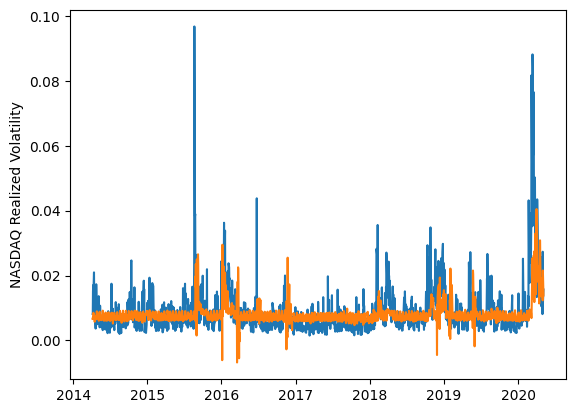

In [30]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")

# H=22 Forecasts

In [31]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [32]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [33]:
for i in range (15):
  n_features = 3
  n_input = 189
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=3, dilations=[1,2,4,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=3)
  test=test[:len(test)-19]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.3971 - accuracy: 0.0527 - mean_absolute_error: 0.3971
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0444 - accuracy: 0.0489 - mean_absolute_error: 0.0444
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5714 - accuracy: 0.0286 - mean_absolute_error: 0.5714
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0486 - accuracy: 0.0515 - mean_absolute_error: 0.0486
Epoch 3/3
3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.5253 - accuracy: 0.0368 - mean_absolute_error: 0.5253
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0494 - accuracy: 0.0353 - mean_absolute_error: 0.0494
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 12ms/step - loss: 0.4183 - accuracy: 0.0592 - mean_absolute_error: 0.4183
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0437 - accuracy: 0.0533 - mean_absolute_error: 0.0437
Epoch 3/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0367 - accuracy: 0.0306 - mean_absolute_error: 0.0367


3/3 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 12ms/step - loss: 0.4450 - accuracy: 0.0518 - mean_absolute_error: 0.4450
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0433 - accuracy: 0.0362 - mean_absolute_error: 0.0433
Epoch 3/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0372 - accuracy: 0.0400 - mean_absolute_error: 0.0372


3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4314 - accuracy: 0.0639 - mean_absolute_error: 0.4314
Epoch 2/3
107/107 [==============================] - 1s 13ms/step - loss: 0.0476 - accuracy: 0.0374 - mean_absolute_error: 0.0476
Epoch 3/3
3/3 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.6534 - accuracy: 0.0539 - mean_absolute_error: 0.6534
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0549 - accuracy: 0.0394 - mean_absolute_error: 0.0549
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4658 - accuracy: 0.0344 - mean_absolute_error: 0.4658
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0467 - accuracy: 0.0185 - mean_absolute_error: 0.0467
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 9ms/step - loss: 0.4793 - accuracy: 0.0327 - mean_absolute_error: 0.4793
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0474 - accuracy: 0.0165 - mean_absolute_error: 0.0474
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.7375 - accuracy: 0.0468 - mean_absolute_error: 0.7375
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0540 - accuracy: 0.1151 - mean_absolute_error: 0.0540
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 8s 10ms/step - loss: 0.5448 - accuracy: 0.0436 - mean_absolute_error: 0.5448
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0480 - accuracy: 0.2387 - mean_absolute_error: 0.0480
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 12ms/step - loss: 0.4445 - accuracy: 0.0527 - mean_absolute_error: 0.4445
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0460 - accuracy: 0.0562 - mean_absolute_error: 0.0460
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 6s 10ms/step - loss: 0.4421 - accuracy: 0.0603 - mean_absolute_error: 0.4421
Epoch 2/3
107/107 [==============================] - 1s 11ms/step - loss: 0.0460 - accuracy: 0.0762 - mean_absolute_error: 0.0460
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 10ms/step - loss: 0.4770 - accuracy: 0.0218 - mean_absolute_error: 0.4770
Epoch 2/3
107/107 [==============================] - 1s 10ms/step - loss: 0.0494 - accuracy: 0.0247 - mean_absolute_error: 0.0494
Epoch 3/3
3/3 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/3
107/107 [==============================] - 7s 9ms/step - loss: 0.5599 - accuracy: 0.0648 - mean_absolute_error: 0.5599
Epoch 2/3
107/107 [==============================] - 1s 9ms/step - loss: 0.0479 - accuracy: 0.0668 - mean_absolute_error: 0.0479
Epoch 3/3
3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
Accuracy

[37.07418867671931,
 22.68528795349426,
 39.75737220884458,
 34.05647799732795,
 24.340032155492253,
 31.890526950754637,
 31.126028659871697,
 30.00070941015022,
 37.1369213265327,
 40.48065533352363,
 31.57974358883513,
 34.09401548901616,
 37.830448417193196,
 31.471640283970725,
 30.787801274713857]

In [35]:
RMSE

[0.0043492385322223956,
 0.005148262205922523,
 0.004370029528221361,
 0.004478321212017032,
 0.005109580545879089,
 0.004746429257743457,
 0.004702645245776601,
 0.004722948340809544,
 0.004500930044539137,
 0.004433451834180639,
 0.004619290727845526,
 0.004617206992228976,
 0.004362874649902467,
 0.004575887149061788,
 0.004663600419688731]

In [36]:
Quasilikelihood

[0.22828470491347239,
 0.2996950603539389,
 0.21462238995235464,
 0.2488220642574124,
 0.2815250542319998,
 0.25184113800431196,
 0.2551170339158703,
 0.2583805010616726,
 0.2307609422623765,
 0.2193498758277866,
 0.24792881947788045,
 0.23884699912996463,
 0.22326504696086258,
 0.2514098935921846,
 0.2578949127448991]

Text(0, 0.5, 'NASDAQ Realized Volatility')

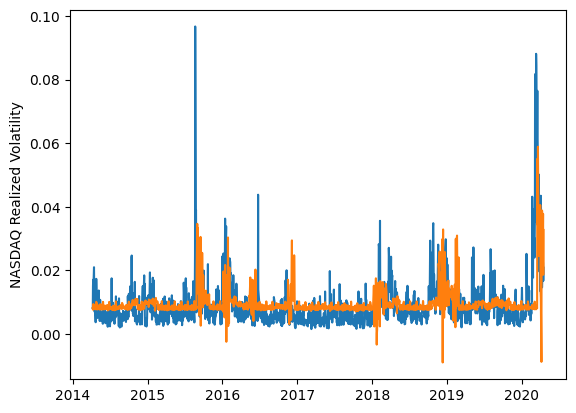

In [37]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")